# Importando as Bibliotecas

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
#------------------------------------------------------------------
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando os Dados

In [ ]:
airbnb =  pd.read_csv('/content/drive/MyDrive/Datasets do Airbnb/amsterdam_weekdays.csv')
airbnb.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
print('Quantidade de linhas e colunas:', airbnb.shape)
print('Quantidade de dados nulos:', airbnb.isna().sum().sum())

Quantidade de linhas e colunas: (1103, 20)
Quantidade de dados nulos: 0


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
airbnb.room_type = airbnb.room_type.astype('category')

# Análise descritiva

In [ ]:
airbnb.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1103.000000,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,318.552978,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,0.000000,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,275.500000,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,551.000000,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,826.500000,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,1102.000000,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


In [ ]:
airbnb = airbnb.drop(['Unnamed: 0'], axis=1)

# Análise exploratória inicial

In [ ]:
airbnb.head(1)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772


In [ ]:
variaveis_numericas = []
for i in airbnb.columns[0:20].tolist():
        if airbnb.dtypes[i] == 'int64' or airbnb.dtypes[i] == 'float64':            
            print(i, ':' , airbnb.dtypes[i]) 
            variaveis_numericas.append(i)

realSum : float64
person_capacity : float64
multi : int64
biz : int64
cleanliness_rating : float64
guest_satisfaction_overall : float64
bedrooms : int64
dist : float64
metro_dist : float64
attr_index : float64
attr_index_norm : float64
rest_index : float64
rest_index_norm : float64
lng : float64
lat : float64


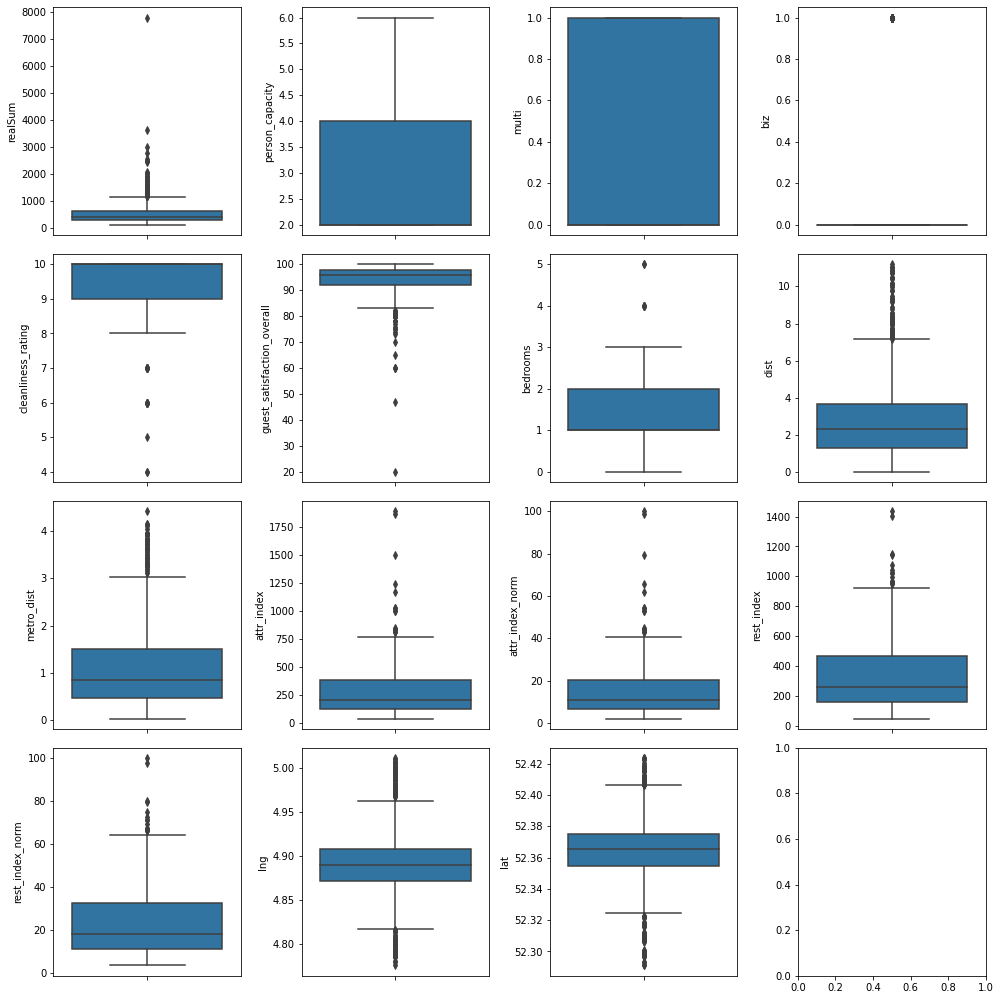

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(4, 4) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = airbnb, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

Bom, como a regressão linear é um modelo que usa a média para prever os valores, com muitos outliers fica dificil fazer uma boa previsão, no entanto vou verificar alguns desses outliers e tentar minimizar a discrepância e tentar utilizar só variáveis que possam fazer sentido pro modelo.

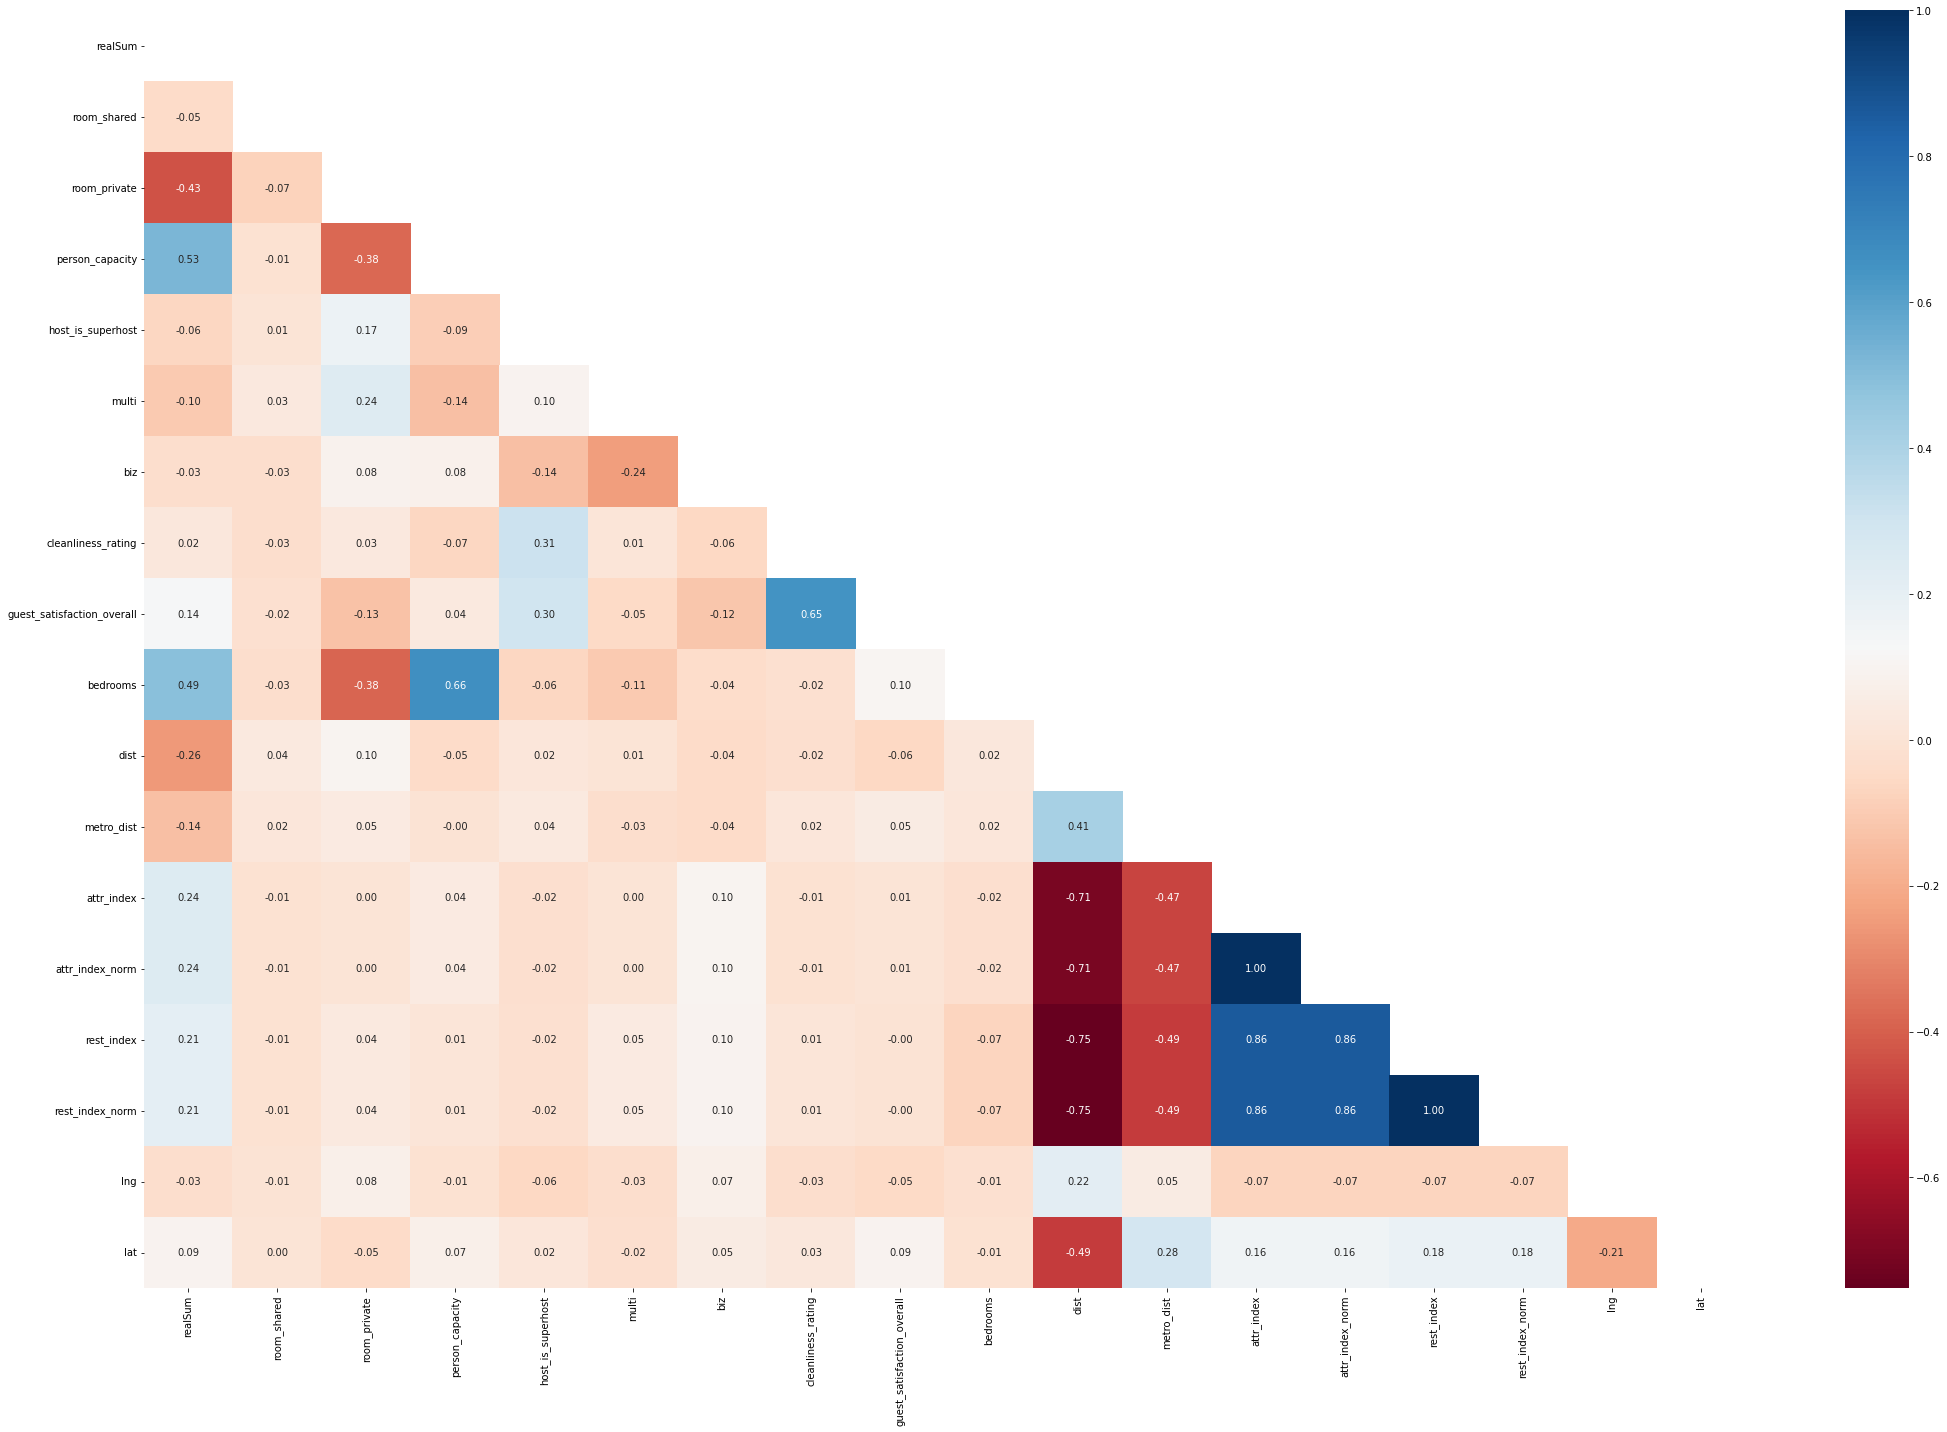

In [ ]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(30,20))
sns.heatmap(
    airbnb.corr(), 
    annot=True, 
    fmt='.2f',
    cmap='RdBu',
    mask=np.triu( 
        np.ones_like(airbnb.corr()) 
    ) 
           )
plt.show()  

A variável preço(Realsum) tem uma leve correlação com a quantidade de quartos(badrooms) e a capacidade de pessoas para acomodação(person capacity)

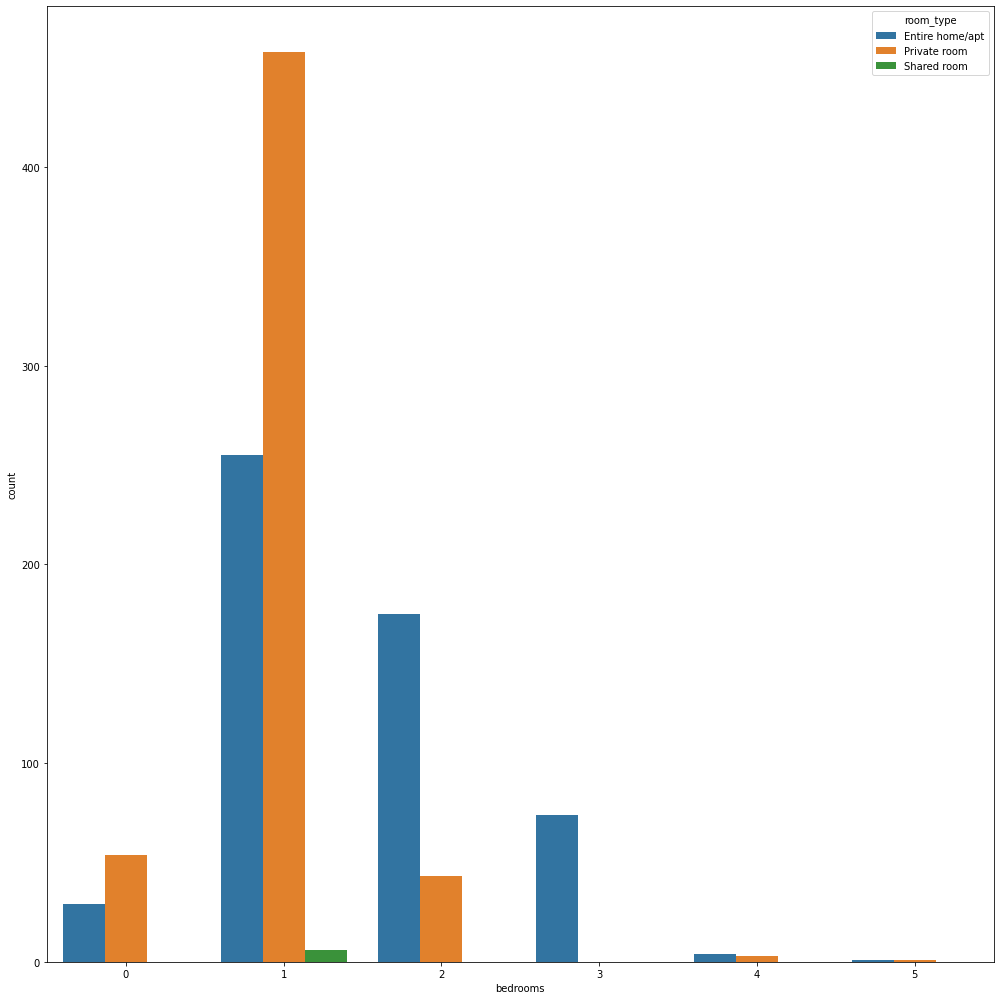

In [ ]:
plt.rcParams['figure.figsize']==[12.00, 3.50]
plt.rcParams['figure.autolayout']=True
sns.countplot(data=airbnb, x='bedrooms', hue='room_type')
plt.show()

De acordo com o gráfico os locatórios preferem imoveis que tenham apenas 1 e 2 quartos que sejam quartos privados e casas e apartamentos.

In [ ]:
airbnb['bedrooms'].value_counts()

1    719
2    218
0     83
3     74
4      7
5      2
Name: bedrooms, dtype: int64

Temos 83 casas sem quartos? é possível isso?

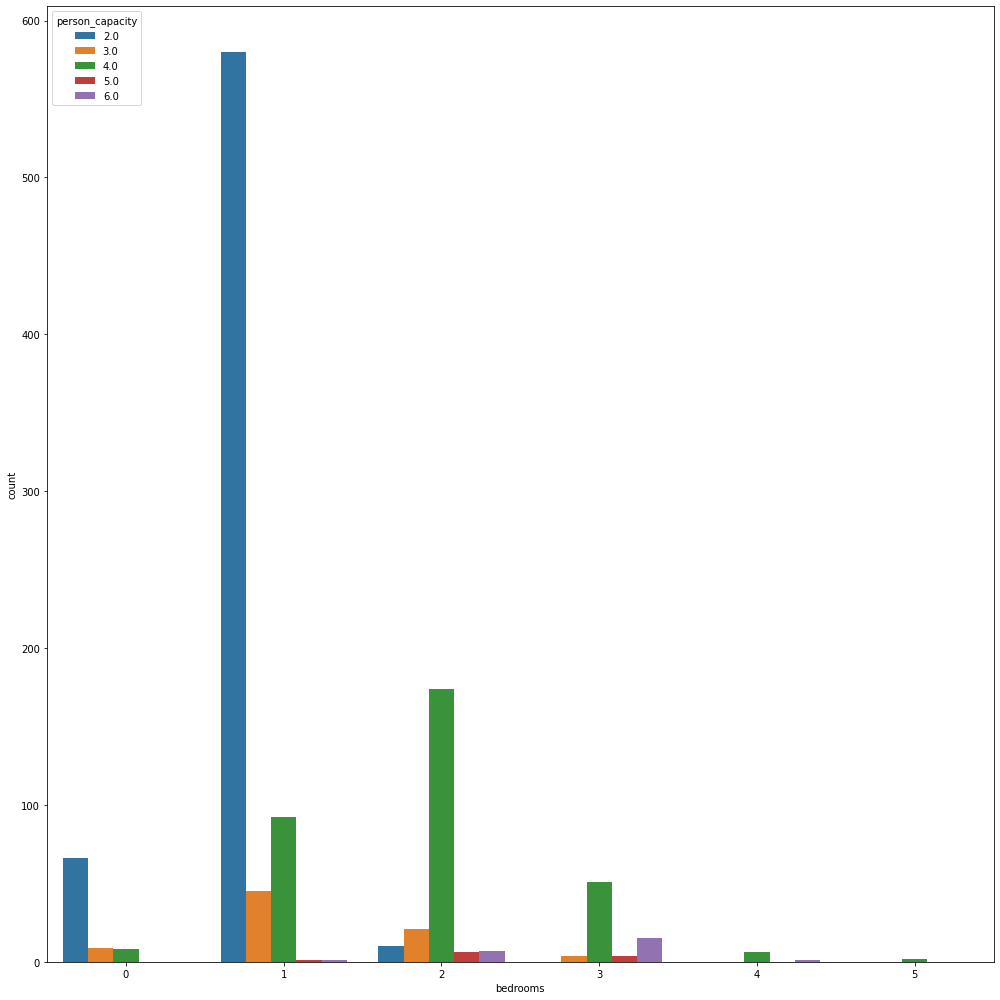

In [ ]:
plt.rcParams['figure.figsize']==[12.00, 3.50]
plt.rcParams['figure.autolayout']=True
sns.countplot(data=airbnb, x='bedrooms', hue='person_capacity')
plt.show()

In [ ]:
airbnb['person_capacity'].value_counts()

2.0    656
4.0    333
3.0     79
6.0     24
5.0     11
Name: person_capacity, dtype: int64

room_type
Entire home/apt    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Private room       AxesSubplot(0.555556,0.125;0.344444x0.328261)
Shared room        AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: realSum, dtype: object

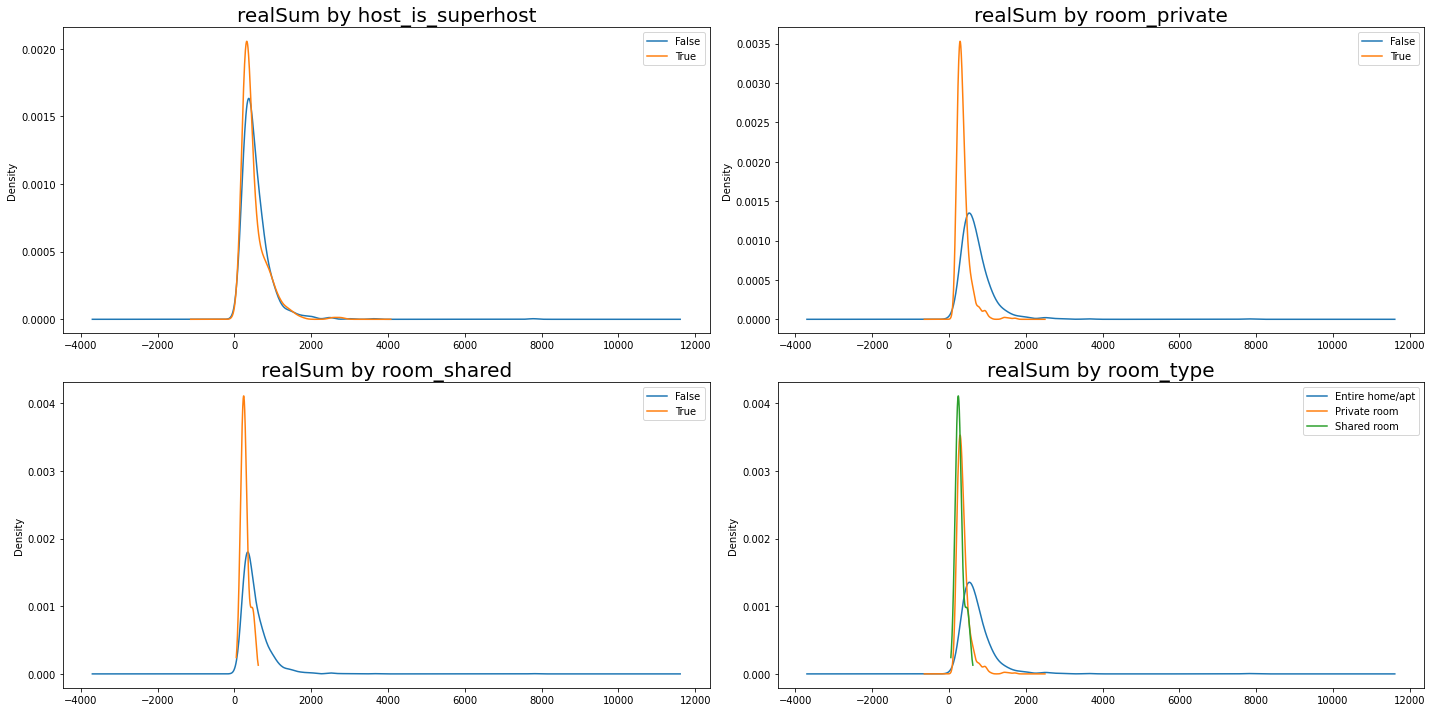

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
airbnb.groupby('host_is_superhost').realSum.plot(kind='kde', ax=axes[0][0], legend=True, title='realSum by host_is_superhost')
airbnb.groupby('room_private').realSum.plot(kind='kde', ax=axes[0][1], legend=True, title='realSum by room_private')
airbnb.groupby('room_shared').realSum.plot(kind='kde', ax=axes[1][0], legend=True, title='realSum by room_shared')
airbnb.groupby('room_type').realSum.plot(kind='kde', ax=axes[1][1], legend=True, title='realSum by room_type')

In [ ]:
# Calculando as distâncias interquartis
#q25 = airbnb.realSum.quantile(0.25)
#q75 = airbnb.realSum.quantile(0.75)
#iqr = q75-q25
# Excluindo registros para além de 1,5*IQR
#dados = airbnb[(airbnb.realSum>=q25-1.5*iqr) & (airbnb.realSum<=q25+1.5*iqr)]
# Estatísticas finais da base
#print('Tamanho da base antes da exclusão de outliers: {}'.format(len(airbnb)))
#print('Tamanho da base após a exclusão de outliers: {}'.format(len(dados)))
#print('Perda percentual de registros: {:.1f}%'.format((len(airbnb)-len(dados))/len(airbnb)*100))

# Engenharia de Features

In [ ]:
airbnb['person_capacity'].value_counts()

2.0    656
4.0    333
3.0     79
6.0     24
5.0     11
Name: person_capacity, dtype: int64

In [ ]:
bins = [-1, 2, 4, 6]
labels = ['até 2 pessoas', '2 a 4 pessoas', ' 4 a 6 pessoas']
airbnb['QTD_pessoas'] = pd.cut(airbnb['person_capacity'], bins=bins, labels=labels)
pd.value_counts(airbnb.QTD_pessoas)

até 2 pessoas     656
2 a 4 pessoas     412
 4 a 6 pessoas     35
Name: QTD_pessoas, dtype: int64

In [ ]:
airbnb['bedrooms'].value_counts()

1    719
2    218
0     83
3     74
4      7
5      2
Name: bedrooms, dtype: int64

In [ ]:
bins = [-1, 2, 4, 5]
labels = ['até 2 quartos', '2 a 4 quartos', ' 4 a 5 quartos']
airbnb['Num_quartos'] = pd.cut(airbnb['bedrooms'], bins=bins, labels=labels)
pd.value_counts(airbnb.Num_quartos)

até 2 quartos     1020
2 a 4 quartos       81
 4 a 5 quartos       2
Name: Num_quartos, dtype: int64

In [ ]:
airbnb=airbnb.drop(['person_capacity', 'bedrooms'], axis=1)

# transformação


In [ ]:
dados_RL = airbnb[['realSum', 'room_private', 'multi', 'biz', 	'cleanliness_rating', 'guest_satisfaction_overall',	'dist', 	'metro_dist', 	'attr_index','attr_index_norm',	'rest_index',	'rest_index_norm', 'lng',	'lat','QTD_pessoas',	'Num_quartos' ]]

In [ ]:
#dados_RL = pd.get_dummies(dados_RL, columns=['room_private', 'QTD_pessoas',	'Num_quartos' ], drop_first=True)
#dados_RL.head(2)

In [ ]:
dados_categorico = dados_RL[['room_private','QTD_pessoas',	'Num_quartos' ]]

In [ ]:
ohe = OneHotEncoder()
ohe.fit(dados_categorico[['room_private','QTD_pessoas',	'Num_quartos']])
dados_ok= ohe.transform(dados_categorico[['room_private','QTD_pessoas',	'Num_quartos']]).todense()
dados_ok

matrix([[0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
df_transfor = pd.DataFrame(dados_ok,columns=ohe.get_feature_names_out())
df_transfor.head()

,room_private_False,room_private_True,QTD_pessoas_ 4 a 6 pessoas,QTD_pessoas_2 a 4 pessoas,QTD_pessoas_até 2 pessoas,Num_quartos_ 4 a 5 quartos,Num_quartos_2 a 4 quartos,Num_quartos_até 2 quartos
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
dados_num = dados_RL[['cleanliness_rating','multi', 'biz', 'guest_satisfaction_overall',	'dist', 	'metro_dist', 	'attr_index','attr_index_norm',	'rest_index',	'rest_index_norm', 'lng',	'lat''']]

In [ ]:
#Esses dados será usado na regressão linear devido a interpretabilidade.
dados_para_rl = pd.concat([dados_num,df_transfor], axis=1 )

In [ ]:
robust = RobustScaler()

In [ ]:
robust.fit(dados_num)
robust.transform(dados_num)

array([[ 0.        ,  1.        ,  0.        , ..., -0.52973122,
         0.4317775 ,  2.52079304],
       [-2.        ,  0.        ,  0.        , ...,  1.88679985,
         0.27646978,  0.422147  ],
       [-1.        ,  0.        ,  1.        , ..., -0.53910578,
         2.34365964, -0.2205029 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.19576511,
        -0.0286383 ,  0.59912959],
       [-2.        ,  0.        ,  0.        , ...,  0.24959736,
         0.46454633, -0.36992263],
       [-2.        ,  0.        ,  0.        , ...,  1.78939512,
         0.08095828,  0.49129594]])

In [ ]:
dados_num_ok = pd.DataFrame(robust.transform(dados_num),columns=dados_num.columns)
dados_num_ok.head(3)

,cleanliness_rating,multi,biz,guest_satisfaction_overall,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.0,1.0,0.0,-0.500000,1.143012,1.606811,-0.500865,-0.500865,-0.529731,-0.529731,0.431778,2.520793
1,-2.0,0.0,0.0,-1.833333,-0.789818,-0.588563,1.636144,1.636144,1.886800,1.886800,0.276470,0.422147
2,-1.0,0.0,1.0,-1.500000,1.452187,2.668468,-0.514073,-0.514073,-0.539106,-0.539106,2.343660,-0.220503


In [ ]:
dados_prontos = pd.concat([dados_num_ok,df_transfor],axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


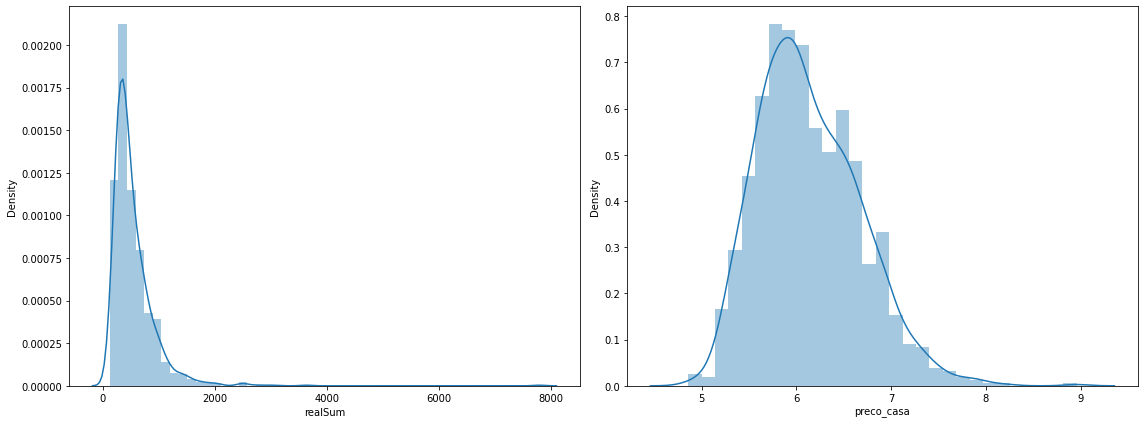

In [ ]:
airbnb['preco_casa'] = np.log(airbnb['realSum'])


fig, axs = plt.subplots(1,2, figsize=(16,6))

sns.distplot(airbnb['realSum'], ax=axs[0])
sns.distplot(airbnb['preco_casa'], ax=axs[1]);

# Regressão Linear

## Utilizando Statsmodels

In [ ]:
dados_prontos.head(1)

,cleanliness_rating,multi,biz,guest_satisfaction_overall,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,room_private_False,room_private_True,QTD_pessoas_ 4 a 6 pessoas,QTD_pessoas_2 a 4 pessoas,QTD_pessoas_até 2 pessoas,Num_quartos_ 4 a 5 quartos,Num_quartos_2 a 4 quartos,Num_quartos_até 2 quartos
0,0.0,1.0,0.0,-0.5,1.143012,1.606811,-0.500865,-0.500865,-0.529731,-0.529731,0.431778,2.520793,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
stats = dados_prontos[['guest_satisfaction_overall',
	'dist',	'attr_index',	'attr_index_norm',	'lat',	
  'room_private_False', 'room_private_True',	'QTD_pessoas_ 4 a 6 pessoas',	'QTD_pessoas_2 a 4 pessoas',	
  'QTD_pessoas_até 2 pessoas', 'Num_quartos_ 4 a 5 quartos',	'Num_quartos_2 a 4 quartos',	'Num_quartos_até 2 quartos']]

In [ ]:
x = stats
y= airbnb['preco_casa']

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
model = sm.OLS(y_treino, x_treino)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             preco_casa   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          2.43e-193
Time:                        19:27:56   Log-Likelihood:                -134.32
No. Observations:                 772   AIC:                             288.6
Df Residuals:                     762   BIC:                             335.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
guest_satisfaction_overall     0.0372      0.010      3.690      0.000       0.017       0.057
dist                          -0.1637      0.020     -8.012      0.000      -0.204      -0.124
attr_index                     0.0598      0.011      5.369      0.000       0.038       0.082
attr_index_norm                0.0598      0.011      5.369      0.000       0.038       0.082
lat                           -0.0646      0.014     -4.645      0.000      -0.092      -0.037
room_private_False             2.9994      0.044     68.140      0.000       2.913       3.086
room_private_True              2.6046      0.044     59.009      0.000       2.518       2.691
QTD_pessoas_ 4 a 6 pessoas     2.1929      0.054     40.294      0.000       2.086       2.300
QTD_pessoas_2 a 4 pessoas      1.9066      0.034     56.358      0.000       1.840       1.973
QTD_pessoas_até 2 pessoas      1.5046      0.036     41.916      0.000       1.434       1.575
Num_quartos_ 4 a 5 quartos     2.0263      0.222      9.129      0.000       1.591       2.462
Num_quartos_2 a 4 quartos      1.9246      0.077     24.962      0.000       1.773       2.076
Num_quartos_até 2 quartos      1.6532      0.071     23.150      0.000       1.513       1.793
==============================================================================
Omnibus:                       59.121   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.599
Skew:                           0.521   Prob(JB):                     1.94e-23
Kurtosis:                       4.471   Cond. No.                     1.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.89e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

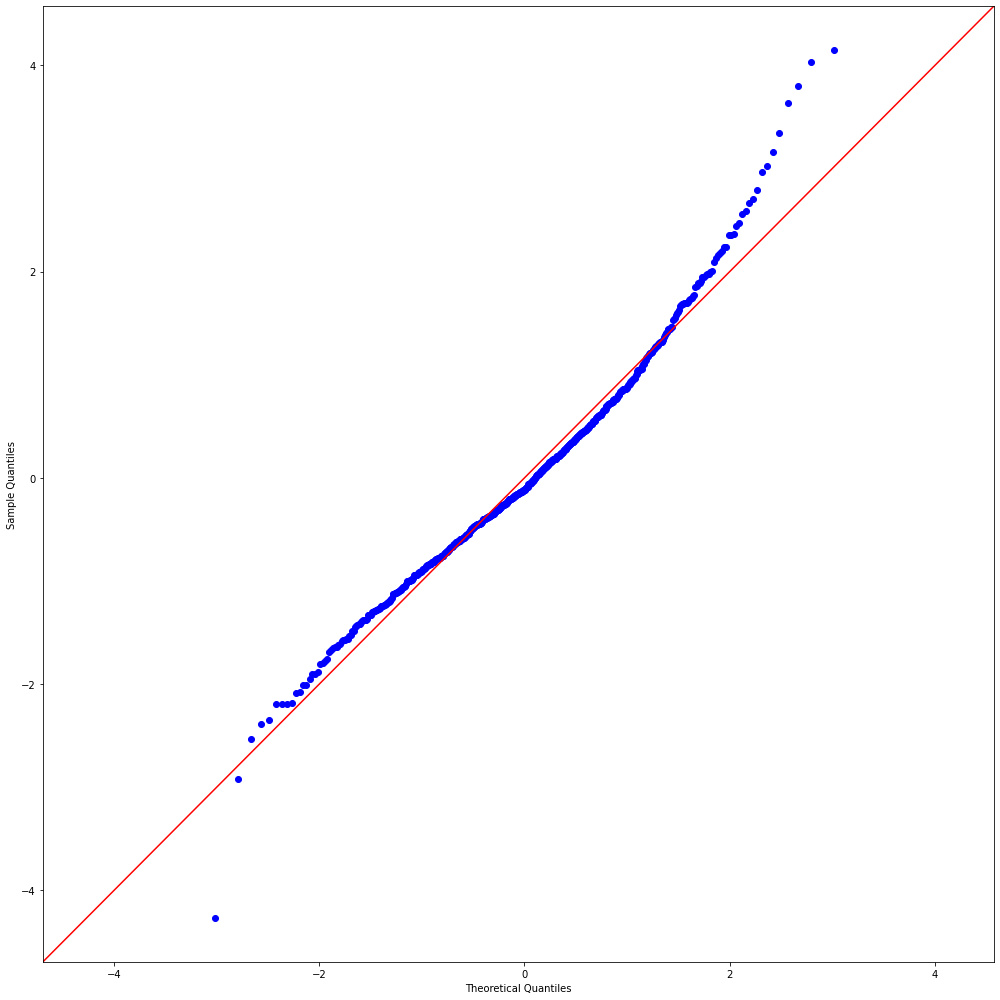

Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)


In [119]:
modelo_residuo = results.resid
modelo_y_ajustado = results.fittedvalues

sm.qqplot(modelo_residuo, line="45", fit=True,dist=stats.norm)
plt.show()

#Teste Shapiro-Wilk
stat, p = shapiro(modelo_residuo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:print('Sample looks Gaussian (fail to reject H0)')
else:print('Sample does not look Gaussian (reject H0)')

Este é o gráfico e teste de normalidade dos resíduos que é a difrença entre o valor real e o predito. E notamos que os erros não tem uma distribuição normal e nem uma variância constante, que de fato é um indicativo péssimo para o modelo.

# Regressão Linear Múltipla 2


In [85]:
x_casa = dados_para_rl.values
y_casa = airbnb['realSum']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_casa, y_casa, test_size=0.3, random_state=0)

In [88]:
x_train.shape, y_train.shape

((772, 20), (772,))

In [89]:
x_test.shape, y_test.shape

((331, 20), (331,))

In [90]:
regressor_casa = LinearRegression()
regressor_casa.fit(x_train, y_train)

LinearRegression()

In [91]:
#B0                                      B1
regressor_casa.intercept_, regressor_casa.coef_

(64622.909551069264,
 array([ 1.05679400e+01, -2.98999233e+01, -7.62250143e+01,  2.57267280e+00,
        -2.52639014e+01, -8.07912040e-02,  4.36124721e-01,  2.30930937e-02,
        -2.93335083e-02, -2.04400108e-03,  2.57608905e+02, -1.24922269e+03,
         9.36751847e+01, -9.36751847e+01,  2.52229401e+02, -1.52912044e+01,
        -2.36938197e+02,  4.63831536e+01,  1.27419523e+02, -1.73802676e+02]))

In [96]:
# valores previsto para cada  imóvel da base de dados.
previsao = regressor_casa.predict(x_test)

previsao

array([ 363.34075085,  408.4242823 ,  254.131854  ,  142.66578055,
        427.21981032,  613.78000659,  737.17832249,  494.12270376,
        269.08279049,  521.26439609,  450.40085692,  826.7490861 ,
        873.1924119 ,  142.33359087,  160.34792518,  701.37837166,
        412.27254531,  495.35553697,   68.13338   ,  215.49638664,
        141.53595833,  254.64637968,  402.317981  ,  150.33373585,
        817.11219373,  748.08639801,  675.18076187,  265.40700394,
        345.58706034,  373.25840573,  221.98942045,  539.24934109,
        584.34418967,  139.4967695 ,  292.21839442,  486.65966872,
        496.26467911,  653.29495598,  487.50998301,  263.70723819,
       1399.04011247,  697.30012791,   54.49076928,  824.83056594,
        604.03340163,  748.27966861,  786.22024579,  994.01353385,
        432.50204473,  503.97493712,  993.98590078,  536.93654028,
        517.10987437,  771.71415992,  356.37700928, 1017.61275349,
        251.11027684,  257.15499376,  603.83702115,  658.19393

In [98]:
# valor real 
y_test.values

array([ 391.81683969,  277.69315492,  280.03655707,  258.24291707,
        718.95578   ,  749.42000797,  657.32430342,  292.45658848,
        298.78377428,  847.84289832,  288.70714503,  774.7287512 ,
        921.66006608,  175.75516134,  614.44004406,  890.9614979 ,
        291.05054718,  385.95833431,  253.32177255,  233.63719448,
        209.03147189,  233.63719448,  337.68424999,  215.12431748,
        550.46516533,  399.55006679,  970.87151126,  295.03433084,
        399.55006679,  350.1042814 ,  303.00189816,  346.58917817,
        356.19712699,  237.85531835,  271.60030933,  306.04832095,
        282.84863966,  764.41778174,  552.80856748,  221.21716308,
       1161.15576594,  899.63208586,  209.03147189,  642.56086987,
       1032.50298784,  356.4314672 ,  602.02001265,  765.58948281,
        422.74974808,  313.31286762,  706.5357486 ,  470.78949218,
        337.91859021,  442.43432615,  430.24863497,  599.6766105 ,
        288.70714503,  181.84800694,  688.0228716 ,  636.70236

Observando os valores reais e os valores preditos, o modelo não está fazendo uma boa previsão e também não está muito ruim.

In [93]:
# Score R2 base de treino
regressor_casa.score(x_train, y_train)

0.5615309396646313

In [94]:
#score R2 base de teste
regressor_casa.score(x_test, y_test)

0.29507487310414626

In [105]:
mean_absolute_error(y_test, previsao)

189.31952201277798

189.31 Euros da média absoluta  dos erros, indica que o modelo pode errar tanto para menos, quanto pra mais. 

# RandomForest Regression

In [107]:
x_rf = dados_para_rl
y_rf = airbnb['realSum']


In [108]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=0)

In [112]:
x_train_rf.shape, y_train_rf.shape

((772, 20), (772,))

In [114]:
x_test_rf.shape, y_test_rf.shape

((331, 20), (331,))

In [115]:
rf = RandomForestRegressor(n_estimators=100,random_state=42).fit(x_train_rf, y_train_rf)
rf_predict = rf.predict(x_test_rf)

In [116]:
rf.score(x_train_rf, y_train_rf)

0.9331250911845845

In [117]:
rf.score(x_test_rf, y_test_rf)

0.2778882240099392

A performace dos meus dados de testes estão péssimas nos dois algorítimos.

In [118]:
mean_absolute_error(y_test_rf, rf_predict)

169.98976903187688

Podemos notar que os erros de previsão deu 169.98 Euros, tanto para mais quanto para menos. Mesmo assim ainda não é uma boa performace/ previsão. 

# Final

Essa base de dados é uma base do kaggle que utilizei para fazer previsão dos valores das casas da Airbnb. Ao decorrer do processo de construção do modelo, obtive problemas em minimizar os outliers. Porque como os dados são reias, então de fato não saberia como fazer com eles de uma forma que não prejudicasse as informações na base de dados. Fiz algumas tranformações, ajustes, engenharia de features e não tive muito sucesso nas performaces do meu modelo principalmente o mal desenpenho na base de teste que seria o overtting. 